In [1]:
#!python /c/repos/ReX/ReX/rex.py /c/repos/Explainable-AI/ReX/cat_1.png -c --model /c/repos/Explainable-AI/ReX/my_model.h5

(-0.5, 255.5, 255.5, -0.5)

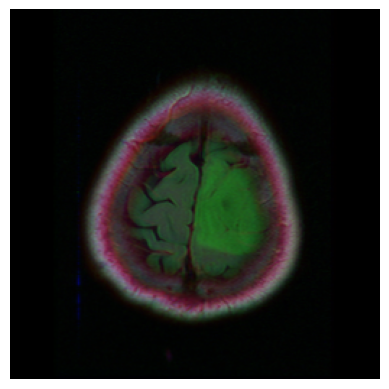

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('1.tif')

plt.imshow(image)
plt.axis('off')

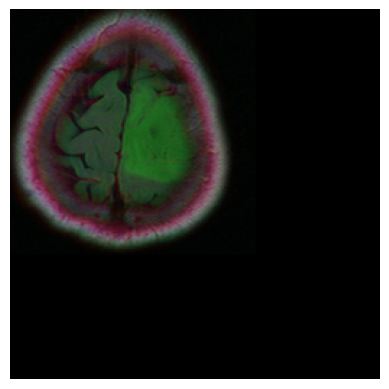

True

In [3]:
import numpy as np
import tifffile as tiff

image2 = np.zeros((256, 256, 3), dtype=np.uint8)
cropped = image[50:220, 50:220, :]
image2[0:170, 0:170, :] = cropped

plt.imshow(image2)
plt.axis('off')
plt.show()

cv2.imwrite('2.tif', image2)

1/1 [==============================] - 1s 1s/step
Predicted: [('n02089973', 'English_foxhound', 1.0), ('n07614500', 'ice_cream', 1.1422357e-16), ('n07747607', 'orange', 2.2923747e-18)]


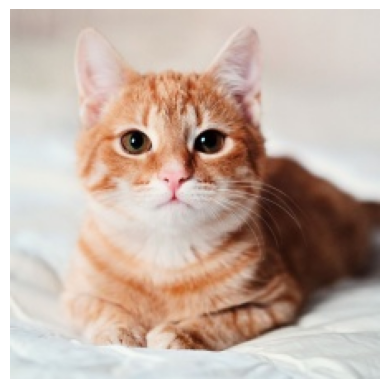

In [4]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = tf.keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


path_to_image = "cat_resized.jpg";
img = cv2.imread(path_to_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img0 = img[0:224, 0:224, :]
dim = (224, 224)
img0 = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

img1 = np.expand_dims(img0, axis=0)
prediction = model.predict(img1)
plt.imshow(img0)
plt.axis('off')

print('Predicted:', decode_predictions(prediction, top=3)[0])

True

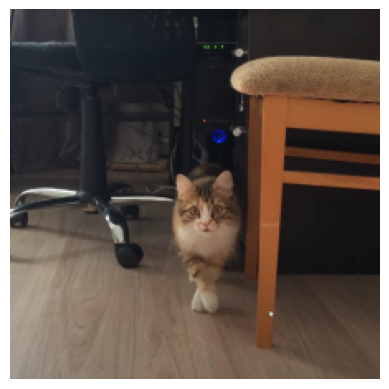

In [5]:
path_to_image = "cat_1.png";
img = cv2.imread(path_to_image)
#img = img[100:1000, 600:1500, :]
dim = (224, 224)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite(path_to_image, img)

In [6]:
model = tf.keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

model.save("my_model.h5")

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
from subprocess import Popen, PIPE, CalledProcessError

cmd=    [
            "python",
            "/repos/ReX/ReX/rex.py",
            "/repos/Explainable-AI/ReX/cat_1.jpg",
            "-c",
            "--model",
            "/repos/Explainable-AI/ReX/my_model.h5",
            "--strategy",
            "linear"
        ]

with Popen(cmd, stdout=PIPE, bufsize=1, universal_newlines=True) as p:
    for line in p.stdout:
        print(line, end='') # process line here

if p.returncode != 0:
    raise CalledProcessError(p.returncode, p.args)

CalledProcessError: Command '['python', '/repos/ReX/ReX/rex.py', '/repos/Explainable-AI/ReX/cat_1.jpg', '-c', '--model', '/repos/Explainable-AI/ReX/my_model.h5', '--strategy', 'linear']' returned non-zero exit status 1.